In [1]:
import pandas as pd

df = pd.read_csv('winemag-data-130k-v2.csv')
df.rename( columns={'Unnamed: 0':'id'}, inplace=True )
df.head()

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [2]:
df=df.dropna(subset=['points','province','variety'])

In [3]:
# country points province varity
import numpy as np
coun = df['country'].to_numpy(dtype='str')
provinces = df['province'].to_numpy(dtype='str')
desig = df['designation'].to_numpy(dtype='str')
reg1 = df['region_1'].to_numpy(dtype='str')
var = df['variety'].to_numpy(dtype='str')
winery = df['winery'].to_numpy(dtype='str')
print('unique countries: ',len(np.unique(coun)))
print('unique provinces: ',len(np.unique(provinces)))
print('unique designations: ',len(np.unique(desig)))
print('unique regions: ',len(np.unique(reg1)))
print('unique varieties: ',len(np.unique(var)))
print('unique wineries: ',len(np.unique(winery)))


unique countries:  43
unique provinces:  425
unique designations:  37955
unique regions:  1230
unique varieties:  701
unique wineries:  16745


In [4]:
dataset = df[['province','variety','points','price']]

In [5]:
dataset.head()

,province,variety,points,price
0,Sicily & Sardinia,White Blend,87,NaN
1,Douro,Portuguese Red,87,15.0
2,Oregon,Pinot Gris,87,14.0
3,Michigan,Riesling,87,13.0
4,Oregon,Pinot Noir,87,65.0


In [6]:
test_data = dataset[dataset['price'].isna()]
test_data = test_data[['province','variety','points']]

train_data = dataset[dataset['price'].notna()]
y = train_data[['price']]
train_data = train_data[['province','variety','points']]
print('test data:',len(test_data))
print('train data:',len(train_data))

test data: 8992
train data: 120915


In [7]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

In [8]:
enc.fit(pd.concat([train_data,test_data]))
X_train=enc.transform(train_data).toarray()
X_test=enc.transform(test_data).toarray()

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y, test_size=0.20, random_state=42, shuffle=False)

In [10]:
X_train[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [11]:
enc.categories_

[array(['Achaia', 'Aconcagua Costa', 'Aconcagua Valley', 'Aegean',
        'Agioritikos', 'Ahr', 'Alenquer', 'Alentejano', 'Alentejo',
        'Alenteo', 'Algarve', 'Alsace', 'America', 'Amindeo', 'Amyndeon',
        'Andalucia', 'Ankara', 'Apalta', 'Arcadia', 'Arizona', 'Armenia',
        'Atalanti Valley', 'Atlantida', 'Attica', 'Australia Other',
        'Austria', 'Awatere Valley', 'Baden', 'Bairrada', 'Beaujolais',
        'Beira Atlantico', 'Beira Interior', 'Beiras', 'Bekaa Valley',
        'Beotia', 'Black Sea Coastal', 'Bordeaux', 'Bot River', 'Brazil',
        'Brda', 'Breede River Valley', 'Breedekloof', 'British Columbia',
        'Bucelas', 'Buin', 'Bulgaria', 'Burgenland', 'Burgundy',
        'Bío Bío Valley', 'Cachapoal Valley', 'Cahul', 'California',
        'Campanha', 'Canada Other', 'Canelones', 'Canterbury',
        'Cape Agulhas', 'Cape Peninsula', 'Cape South Coast', 'Cappadocia',
        'Carnuntum', 'Casablanca & Leyda Valleys', 'Casablanca Valley',
        'Cas

In [12]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing


In [13]:
X_train[0].shape

(1147,)

In [14]:
model = keras.Sequential([
    layers.Dense(1024, activation='relu'),
#     layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])


model.compile(loss='mean_absolute_error',optimizer='adam')

In [15]:
history = model.fit(X_train,y_train,validation_data=(X_valid,y_valid),verbose=1, epochs=10)

Epoch 1/10
3023/3023 [==============================] - 30s 10ms/step - loss: 13.2630 - val_loss: 12.7197
Epoch 2/10
3023/3023 [==============================] - 30s 10ms/step - loss: 12.1400 - val_loss: 12.4959
Epoch 3/10
3023/3023 [==============================] - 31s 10ms/step - loss: 11.9521 - val_loss: 12.5068
Epoch 4/10
3023/3023 [==============================] - 32s 10ms/step - loss: 11.8270 - val_loss: 12.3727
Epoch 5/10
3023/3023 [==============================] - 31s 10ms/step - loss: 11.7401 - val_loss: 12.4849
Epoch 6/10
3023/3023 [==============================] - 31s 10ms/step - loss: 11.6682 - val_loss: 12.3746
Epoch 7/10
3023/3023 [==============================] - 33s 11ms/step - loss: 11.6095 - val_loss: 12.3150
Epoch 8/10
3023/3023 [==============================] - 31s 10ms/step - loss: 11.5683 - val_loss: 12.3345
Epoch 9/10
3023/3023 [==============================] - 30s 10ms/step - loss: 11.5281 - val_loss: 12.4215
Epoch 10/10
3023/3023 [=======================

In [16]:
model.predict(X_train[:5])

array([[15.189443 ],
       [16.06209  ],
       [17.495445 ],
       [31.20386  ],
       [14.8837385]], dtype=float32)

In [17]:
print(y_train[:5])

   price
1   15.0
2   14.0
3   13.0
4   65.0
5   15.0


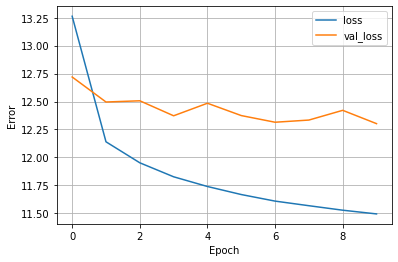

In [18]:
import matplotlib.pyplot as plt
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

plot_loss(history)